# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-08-07 07:01:03.559863


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/6/20


,8/6/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4883582,160104,3.28
Brazil,2912212,98493,3.38
Mexico,462690,50517,10.92
United Kingdom,309796,46498,15.01
India,2027074,41585,2.05
Italy,249204,35187,14.12
France,231310,30308,13.10


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 8/6/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
34251,US,4771080,2020-08-04,157482.0,1378.0,57540.0,59267.714286
34250,US,4713540,2020-08-03,156104.0,539.0,45368.0,60457.571429
34249,US,4668172,2020-08-02,155565.0,406.0,47580.0,62035.571429
34248,US,4620592,2020-08-01,155159.0,1111.0,58485.0,63088.857143
34247,US,4562107,2020-07-31,154048.0,1246.0,67092.0,64225.142857
34246,US,4495015,2020-07-30,152802.0,1216.0,68033.0,65171.285714
34245,US,4426982,2020-07-29,151586.0,1436.0,70776.0,65265.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/6/20


,8/6/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,418928,32756.0,7.82
New Jersey,183701,15849.0,8.63
California,541339,10021.0,1.85
Massachusetts,119874,8691.0,7.25
Texas,483920,8569.0,1.77
Illinois,189705,7791.0,4.11
Florida,510389,7747.0,1.52


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 8/6/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1185,California,526685,2020-08-04,9684.0,243.0,9834.0,7989.000000
1184,California,516851,2020-08-03,9441.0,45.0,4676.0,8390.000000
1183,California,512175,2020-08-02,9396.0,51.0,5562.0,8555.285714
1182,California,506613,2020-08-01,9345.0,131.0,6057.0,8594.428571
1181,California,500556,2020-07-31,9214.0,188.0,7622.0,8624.428571
1180,California,492934,2020-07-30,9026.0,118.0,8021.0,8880.142857
1179,California,484913,2020-07-29,8908.0,229.0,14151.0,9089.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 8/6/20


,8/6/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,201200,4869.0,2.42
Riverside,39741,770.0,1.94
Orange,38711,697.0,1.80
San Diego,31127,583.0,1.87
San Bernardino,34635,490.0,1.41
Imperial,9601,240.0,2.50
Alameda,12884,206.0,1.60


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 8/6/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3759,Los Angeles,195805,2020-08-04,4760.0,58.0,1928.0,2451.857143
3758,Los Angeles,193877,2020-08-03,4702.0,9.0,1700.0,2549.857143
3757,Los Angeles,192177,2020-08-02,4693.0,24.0,1320.0,2594.285714
3756,Los Angeles,190857,2020-08-01,4669.0,45.0,2316.0,2647.428571
3755,Los Angeles,188541,2020-07-31,4624.0,65.0,2505.0,2800.857143
3754,Los Angeles,186036,2020-07-30,4559.0,41.0,2580.0,2738.285714
3753,Los Angeles,183456,2020-07-29,4518.0,92.0,4814.0,2617.428571
3752,Los Angeles,178642,2020-07-28,4426.0,51.0,2614.0,2373.857143
3751,Los Angeles,176028,2020-07-27,4375.0,15.0,2011.0,2426.142857
3750,Los Angeles,174017,2020-07-26,4360.0,9.0,1692.0,2585.714286



7 day new US cases as of 8/6/20


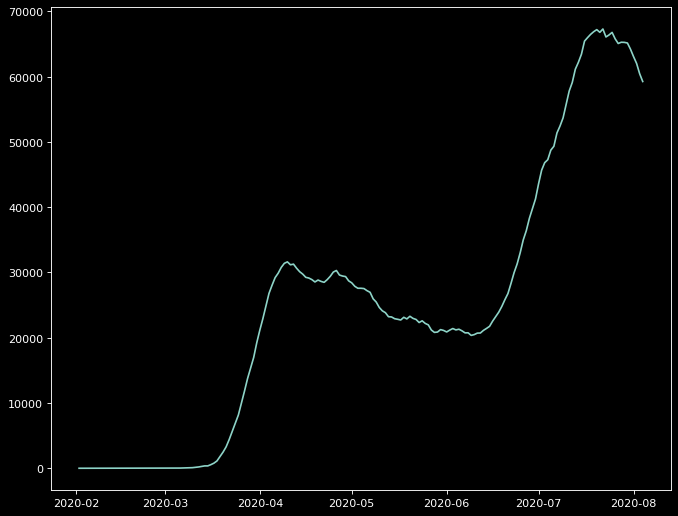

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 8/6/20


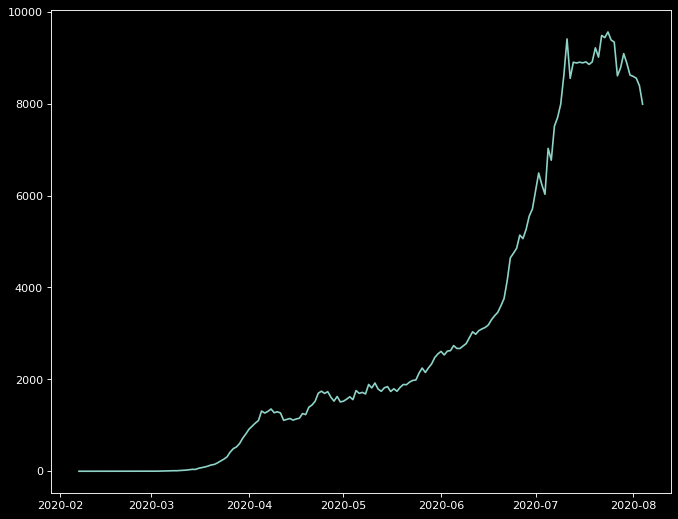

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 8/6/20


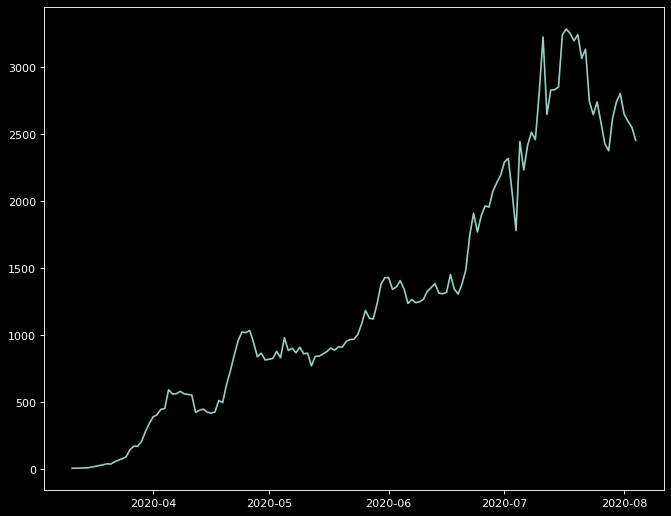

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()